
### Objectiu del departament d'An√†lisi de Perfil Client:

> Quines combinacions de caracter√≠stiques demogr√†fiques (com edat, nivell educatiu i ocupaci√≥) s√≥n m√©s comunes entre els clients que utilitzen m√∫ltiples productes financers del banc: loan, hipoteca, dip√≤sit?

### Llibreries i c√†rrega de dades

In [26]:
%pip install plottable
%pip install kmodes
%pip install yellowbrick
%pip install numpy scipy statsmodels


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
"""Libreries que poden ser necess√†ries"""

# Manejo de datos
import pandas as pd                 # An√°lisis y manipulaci√≥n de datos en tablas
import numpy as np                  # C√°lculos num√©ricos y matrices
import os                           # Gesti√≥n de rutas de archivos

# Visualizaci√≥n de datos
import matplotlib.pyplot as plt     # Gr√°ficos b√°sicos en 2D
import seaborn as sns               # Gr√°ficos estad√≠sticos mejorados
import plotly.express as px         # Gr√°ficos interactivos simplificados
import plotly.graph_objects as go   # Control avanzado de gr√°ficos en Plotly
import plotly.io as pio             # Interfaz de entrada/salida de Plotly
import squarify                     # Visualizaci√≥n de diagramas de "treemap"
from plottable import Table         # Visualizaci√≥n de tablas
import matplotlib.colors as mcolors #¬†Colores y mapas de colores

#¬†Clustering y agrupamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from statsmodels.multivariate.manova import MANOVA



In [28]:
df = pd.read_csv("../Data/df_250526.csv")

Paleta de colors

In [29]:
custom_palette = ["#AABBC8", "#2CCED1", "#5F6F81", "#DCE3EA", "#2E2F36"]  
sns.set_palette(sns.color_palette(custom_palette))

### Extracte KPIs

In [30]:

#¬†Variables 
contactados   = df.nunique().id                                     # N√∫mero total de clientes contactados
suscribieron  = df[df['deposit'] == True].nunique().id             # N√∫mero de clientes que suscribieron 
duracion_llam = df[df['deposit'] == True].duration.sum()           # Duraci√≥n de llamadas a suscriptores
llam_telf = df[df['contact'] == 'telephone']['campaign'].sum()      # N√∫mero de llamadas realizadas por tel√©fono
llam_cell = df[df['contact'] == 'cellular']['campaign'].sum()       # N√∫mero de llamadas realizadas por movil
llam = df['campaign'].sum()                                         #¬†N√∫mero total de llamadas
contatos_previos_sus = df[df['deposit'] == True]['previous'].sum() # N√∫mero de contactos previos a suscriptores
suscribieron_por_mes = df[df['deposit'] == True].groupby('month').count()['deposit']  # Suscriptores en el mes
contactos_por_mes = df.groupby('month').count()['deposit']          # clientes contactados en el mes      
conversion_por_mes = suscribieron_por_mes / contactos_por_mes       #¬†conversi√≥n por mes


# Prints
print("El n√∫mero total de clientes contactados es:",contactados)
print("El n√∫mero de suscriptores es:",suscribieron)
print("La duraci√≥n total de las llamadas a suscriptores es:",duracion_llam)
print("El n√∫mero de llamadas realizadas a tel√©fono fijo es: ", llam_telf)
print("El n√∫mero de llamadas realizadas a m√≥vil es: ", llam_cell)
print("El n√∫mero total de llamadas realizadas es: ", llam)
print("El n√∫mero total de contactos previos de los suscriptores es:", contatos_previos_sus)
print("La conversi√≥n por mes es: ", conversion_por_mes)

El n√∫mero total de clientes contactados es: 26180
El n√∫mero de suscriptores es: 12499
La duraci√≥n total de las llamadas a suscriptores es: 6763175
El n√∫mero de llamadas realizadas a tel√©fono fijo es:  5399
El n√∫mero de llamadas realizadas a m√≥vil es:  45476
El n√∫mero total de llamadas realizadas es:  65801
El n√∫mero total de contactos previos de los suscriptores es: 14668
La conversi√≥n por mes es:  month
Apr    0.630156
Aug    0.456259
Dec    0.902344
Feb    0.576944
Jan    0.409548
Jul    0.413754
Jun    0.446554
Mar    0.903374
May    0.334334
Nov    0.426036
Oct    0.838816
Sep    0.844941
Name: deposit, dtype: float64


In [31]:
#KPIs
kpi1 = suscribieron/contactados          # porcentaje de conversi√≥n a dep√≥sito
kpi2 = duracion_llam/suscribieron        # promedio de duraci√≥n de llamadas a suscriptores
kpi3_tel = llam_telf/llam                # porcentaje de llamadas a tel√©fono
kpi3_cell = llam_cell/llam               # porcentaje de llamadas a m√≥vil
kpi3 = (llam_telf+llam_cell)/llam        # porcentaje de llamadas a tel√©fono o m√≥vil
kpi4 = contatos_previos_sus/suscribieron # promedio de contactos previos a suscriptores
kpi5 = conversion_por_mes.idxmax()       # mes con mayor tasa de conversi√≥n
kpi5_tasa = conversion_por_mes.max()     #¬†tasa de conversi√≥n del mes con mayor tasa de conversi√≥n




#¬†Prints
print("KPI 1: El porcentaje de conversi√≥n a dep√≥sito es ",kpi1*100,"%")
print("KPI 2: La duraci√≥n media de las llamadas a suscriptoreses",kpi2)
#¬†print("KPI 3: El porcentaje de llamadas realizadas por tel√©fono o m√≥vil es ",kpi3*100,"%")
print("KPI 3.1: El porcentaje de llamadas realizadas por tel√©fono fijo es ",kpi3_tel*100,"%")
print("KPI 3.2: El porcentaje de llamadas realizadas por tel√©fono m√≥vil es ",kpi3_cell*100,"%")
print("KPI 4: El porcentaje de contactos previos a suscriptores es ",kpi4)
print("KPI 5: El mes amb millor conversi√≥ ha sigut", kpi5, "amb una taxa de conversi√≥ de", kpi5_tasa)

KPI 1: El porcentaje de conversi√≥n a dep√≥sito es  47.74255156608098 %
KPI 2: La duraci√≥n media de las llamadas a suscriptoreses 541.0972877830227
KPI 3.1: El porcentaje de llamadas realizadas por tel√©fono fijo es  8.205042476558107 %
KPI 3.2: El porcentaje de llamadas realizadas por tel√©fono m√≥vil es  69.11141168067356 %
KPI 4: El porcentaje de contactos previos a suscriptores es  1.1735338827106168
KPI 5: El mes amb millor conversi√≥ ha sigut Mar amb una taxa de conversi√≥ de 0.9033742331288344


# An√†lisi 

### C√†lcul per a clients que no han contractat res

In [32]:
# N√∫mero de clients que van suscriure, tenen pr√®stec i una hipoteca 
df_0contractats = df[(df['deposit'] == False) & (df['loan'] == False) & (df['housing'] == False)] 

df_0contractats_numero = df_0contractats.nunique().id 
print("El n√∫mero de clientes que no suscribieron, no tienen pr√©stamo ni hipoteca es:", df_0contractats_numero)


# Agrupem el dataframe per la combinaci√≥ de les caracter√≠stiques demogr√†fiques 
df_0contractats = df_0contractats.groupby(['age', 'education','job'])


# Creem una taula per al c√†lcul de conversions
taula_pefils_0contractats = []

# Recorrem la taula calculant la conversi√≥ de cada grup
for (edat, educacio, feina), grup in df_0contractats:
    numero = grup.nunique().id

    # Afegim cada resultat a la taula
    taula_pefils_0contractats.append({
        'age': edat,
        'education': educacio,
        'job': feina,
        'n√∫mero': numero,
    })

# Convertim la taula de conversi√≥ en un dataframe 
taula_pefils_0contractats = pd.DataFrame(taula_pefils_0contractats)

# taula_pefils = taula_pefils.set_index(['feina', 'estat_civil', 'educaci√≥'])  # Establim l'√≠ndex de la taula

#¬†Ordenem per 
taula_pefils_0contractats = taula_pefils_0contractats.sort_values(by='n√∫mero', ascending=False)  # Ordenem la taula per n√∫mero de persones

# Reordenem les columnes de la taula

taula_pefils_0contractats.head(15)  # Mostrem les primeres 15 files de la taula

El n√∫mero de clientes que no suscribieron, no tienen pr√©stamo ni hipoteca es: 4928


age  education         job  n√∫mero
152   33   tertiary  management      82
98    30   tertiary  management      74
117   31   tertiary  management      70
135   32   tertiary  management      60
170   34   tertiary  management      55
112   31  secondary  technician      48
209   36   tertiary  management      46
166   34  secondary  technician      45
288   40   tertiary  management      45
95    30  secondary  technician      41
229   37   tertiary  management      38
250   38   tertiary  management      36
269   39   tertiary  management      36
187   35   tertiary  management      35
597   56   tertiary  management      33

### C√†lcul per a clients que han contractat nom√©s un producte


In [33]:
# Crear una nova columna temporal que compta quants productes ha contractat el client
df['productes_contractats'] = df[['deposit', 'loan', 'housing']].sum(axis=1)

# Filtrar els clients que n'han contractat exactament un
df_1contractats = df[df['productes_contractats'] == 1].copy()


df_1contractats_numero = df_1contractats.nunique().id 
print("El n√∫mero de clientes que o bien suscribieron, o bien tienen pr√©stamo o hipoteca es:", df_1contractats_numero)


# Agrupem el dataframe per la combinaci√≥ de les caracter√≠stiques demogr√†fiques 
df_1contractats = df_1contractats.groupby(['age', 'education','job'])


# Creem una taula per al c√†lcul de conversions
taula_pefils_1contractats = []

# Recorrem la taula calculant la conversi√≥ de cada grup
for (edat, educacio, feina), grup in df_1contractats:
    numero = grup.nunique().id

    # Afegim cada resultat a la taula
    taula_pefils_1contractats.append({
        'age': edat,
        'education': educacio,
        'job': feina,
        'n√∫mero': numero,
    })

# Convertim la taula de conversi√≥ en un dataframe 
taula_pefils_1contractats = pd.DataFrame(taula_pefils_1contractats)

# taula_pefils = taula_pefils.set_index(['feina', 'estat_civil', 'educaci√≥'])  # Establim l'√≠ndex de la taula

#¬†Ordenem per 
taula_pefils_1contractats = taula_pefils_1contractats.sort_values(by='n√∫mero', ascending=False)  # Ordenem la taula per n√∫mero de persones

# Reordenem les columnes de la taula

taula_pefils_1contractats.head(15)  # Mostrem les primeres 15 files de la taula


El n√∫mero de clientes que o bien suscribieron, o bien tienen pr√©stamo o hipoteca es: 14777


age  education         job  n√∫mero
214   31   tertiary  management     176
348   36   tertiary  management     170
267   33   tertiary  management     161
295   34   tertiary  management     150
187   30   tertiary  management     147
240   32   tertiary  management     146
320   35   tertiary  management     144
374   37   tertiary  management     134
161   29   tertiary  management     106
135   28   tertiary  management      95
282   34  secondary      admin.      90
401   38   tertiary  management      89
182   30  secondary  technician      89
430   39   tertiary  management      85
542   43   tertiary  management      78

### C√†lcul per a clients que han contractat m√©s d'un producte


In [34]:
# Filtrar els clients que n'han contractat m√©s d‚Äôun (>=2)
df_mes_dun_contractat = df[df['productes_contractats'] >= 2].copy()

# Eliminar la columna temporal si no cal
df_mes_dun_contractat.drop(columns='productes_contractats', inplace=True)


df_mes_dun_contractat_numero = df_mes_dun_contractat.nunique().id 
print("El n√∫mero de clientes que contrataron dos o m√°s productes entre suscribirse, pr√©stamo o hipoteca es:", df_mes_dun_contractat_numero)


# Agrupem el dataframe per la combinaci√≥ de les caracter√≠stiques demogr√†fiques 
df_mes_dun_contractat = df_mes_dun_contractat.groupby(['age', 'education','job'])


# Creem una taula per al c√†lcul de conversions
taula_df_mes_dun_contractat = []

# Recorrem la taula calculant la df_mes_dun_contractat de cada grup
for (edat, educacio, feina), grup in df_mes_dun_contractat:
    numero = grup.nunique().id

    # Afegim cada resultat a la taula
    taula_df_mes_dun_contractat.append({
        'age': edat,
        'education': educacio,
        'job': feina,
        'n√∫mero': numero,
    })

# Convertim la taula de conversi√≥ en un dataframe 
taula_df_mes_dun_contractat = pd.DataFrame(taula_df_mes_dun_contractat)

# taula_pefils = taula_pefils.set_index(['feina', 'estat_civil', 'educaci√≥'])  # Establim l'√≠ndex de la taula

#¬†Ordenem per 
taula_df_mes_dun_contractat = taula_df_mes_dun_contractat.sort_values(by='n√∫mero', ascending=False)  # Ordenem la taula per n√∫mero de persones

# Reordenem les columnes de la taula

taula_df_mes_dun_contractat.head(15)  # Mostrem les primeres 15 files de la taula



El n√∫mero de clientes que contrataron dos o m√°s productes entre suscribirse, pr√©stamo o hipoteca es: 6475


age  education          job  n√∫mero
214   35   tertiary   management      99
171   33   tertiary   management      72
136   31   tertiary   management      72
127   31  secondary  blue-collar      71
289   39   tertiary   management      67
194   34   tertiary   management      67
154   32   tertiary   management      63
110   30  secondary  blue-collar      63
202   35  secondary  blue-collar      55
183   34  secondary  blue-collar      55
126   31  secondary       admin.      53
144   32  secondary       admin.      51
145   32  secondary  blue-collar      49
252   37   tertiary   management      48
150   32  secondary   technician      46

### Verificaci√≥ dels tres grups

In [35]:
print("El n√∫mero de clientes que no suscribieron, no tienen pr√©stamo ni hipoteca es:", df_0contractats_numero)
print("El n√∫mero de clientes que o bien suscribieron, o bien tienen pr√©stamo o hipoteca es:", df_1contractats_numero)
print("El n√∫mero de clientes que contrataron dos o m√°s productes entre suscribirse, pr√©stamo o hipoteca es:", df_mes_dun_contractat_numero)

print("La suma de los anteriores es", df_0contractats_numero + df_1contractats_numero + df_mes_dun_contractat_numero)


print("El total de clientes contactados es", df.nunique().id)


El n√∫mero de clientes que no suscribieron, no tienen pr√©stamo ni hipoteca es: 4928
El n√∫mero de clientes que o bien suscribieron, o bien tienen pr√©stamo o hipoteca es: 14777
El n√∫mero de clientes que contrataron dos o m√°s productes entre suscribirse, pr√©stamo o hipoteca es: 6475
La suma de los anteriores es 26180
El total de clientes contactados es 26180


## Elbow method para encontrar k √≥ptimo
Calculo el costo para diferentes valores de l entre 2 - 9 (inclusive)

https://es.wikipedia.org/wiki/M%C3%A9todo_del_codo_(agrupamiento)
El m√©todo consiste en graficar la variaci√≥n explicada en funci√≥n del n√∫mero de conglomerados y elegir el codo de la curva como el n√∫mero de conglomerados a utilizar. Utilizar el "codo" o la "rodilla de una curva" como punto de corte es un m√©todo com√∫n en la optimizaci√≥n matem√°tica para elegir aquel punto a partir del cual los rendimientos decrecientes ya no justifican el costo adicional.

En este caso, el codo est√° en el 3.

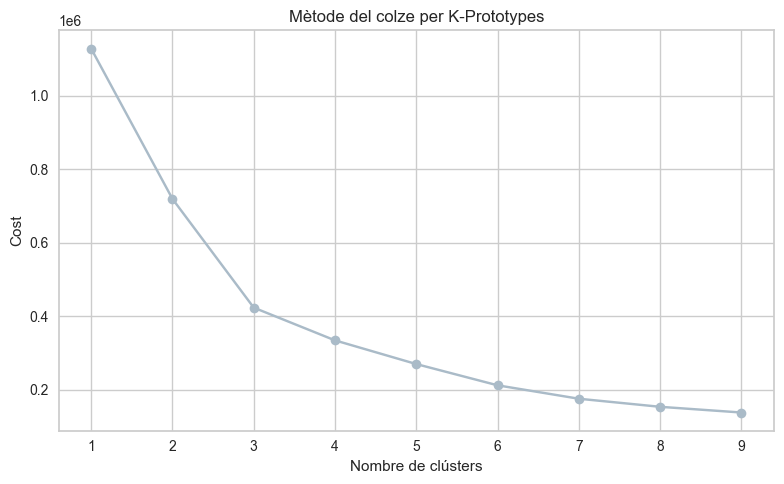

In [36]:
# Unim les tres taules
df_clusters = pd.concat([
    taula_pefils_0contractats.assign(contractats='Cap'),
    taula_pefils_1contractats.assign(contractats='Un'),
    taula_df_mes_dun_contractat.assign(contractats='M√©s d\'un')
], ignore_index=True)

# Preparem les dades per clusteritzar
X = df_clusters[['n√∫mero', 'age', 'education', 'job', 'contractats']].copy()
X[['job', 'education', 'contractats']] = X[['job', 'education', 'contractats']].astype(str)

# Fem un encode per a les categories
X_encoded = X.copy()
X_encoded[['job', 'education', 'contractats']] = X_encoded[['job', 'education', 'contractats']].astype(str)

# Elbow method amb KPrototypes
X_matrix = X_encoded[['n√∫mero', 'age', 'job', 'education', 'contractats']].values

costs = []
K_range = range(1, 10)
for k in K_range:
    kproto = KPrototypes(n_clusters=k, init='Cao', verbose=0)
    kproto.fit_predict(X_matrix, categorical=[2, 3, 4])
    costs.append(kproto.cost_)

# Dibuixar el gr√†fic del m√®tode del colze
plt.figure(figsize=(8,5))
plt.plot(K_range, costs, marker='o')
plt.xlabel('Nombre de cl√∫sters')
plt.ylabel('Cost')
plt.title('M√®tode del colze per K-Prototypes')
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()



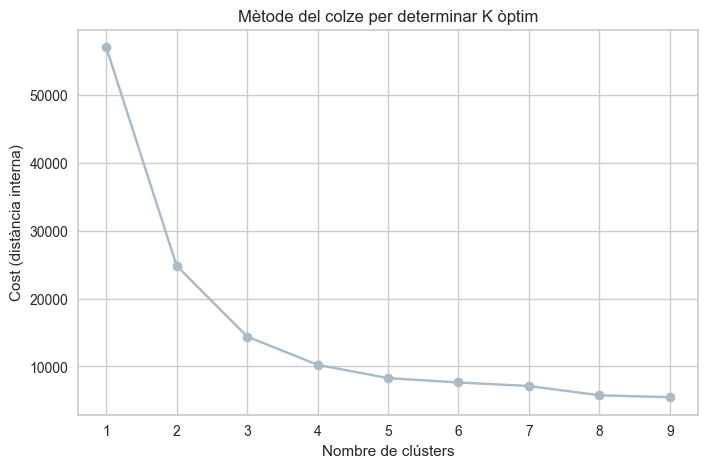

In [37]:

# Seleccionem les columnes rellevants
X = taula_pefils_0contractats[['n√∫mero', 'job', 'education']].copy()
X[['job', 'education']] = X[['job', 'education']].astype(str)

costs = []
K = range(1, 10)

for k in K:
    kproto = KPrototypes(n_clusters=k, init='Cao', verbose=0, random_state=42)
    kproto.fit_predict(X, categorical=[1, 2])
    costs.append(kproto.cost_)

# Dibuixar el gr√†fic del colze
plt.figure(figsize=(8, 5))
plt.plot(K, costs, marker='o')
plt.xlabel('Nombre de cl√∫sters')
plt.ylabel('Cost (dist√†ncia interna)')
plt.title('M√®tode del colze per determinar K √≤ptim')
plt.grid(True)
plt.show()

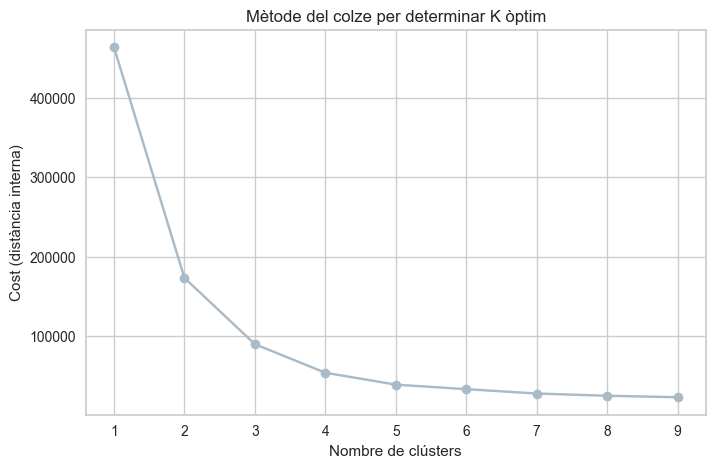

In [38]:
# Seleccionem les columnes rellevants
X = taula_pefils_1contractats[['n√∫mero', 'job', 'education']].copy()
X[['job', 'education']] = X[['job', 'education']].astype(str)

costs = []
K = range(1, 10)

for k in K:
    kproto = KPrototypes(n_clusters=k, init='Cao', verbose=0, random_state=42)
    kproto.fit_predict(X, categorical=[1, 2])
    costs.append(kproto.cost_)

# Dibuixar el gr√†fic del colze
plt.figure(figsize=(8, 5))
plt.plot(K, costs, marker='o')
plt.xlabel('Nombre de cl√∫sters')
plt.ylabel('Cost (dist√†ncia interna)')
plt.title('M√®tode del colze per determinar K √≤ptim')
plt.grid(True)
plt.show()

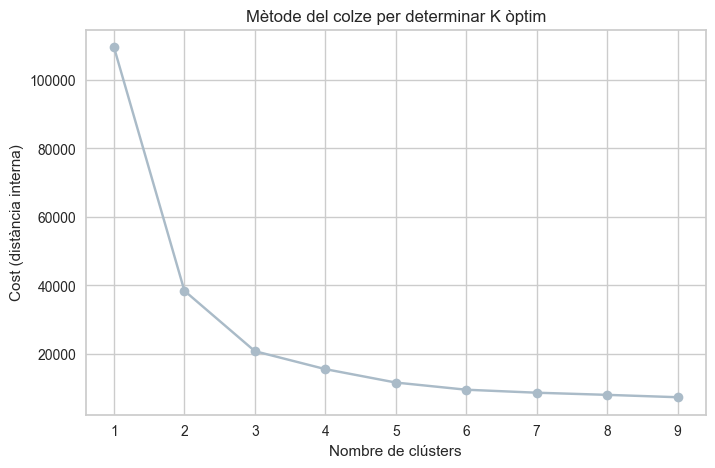

In [39]:
# Seleccionem les columnes rellevants
X = taula_df_mes_dun_contractat[['n√∫mero', 'job', 'education']].copy()
X[['job', 'education']] = X[['job', 'education']].astype(str)

costs = []
K = range(1, 10)

for k in K:
    kproto = KPrototypes(n_clusters=k, init='Cao', verbose=0, random_state=42)
    kproto.fit_predict(X, categorical=[1, 2])
    costs.append(kproto.cost_)

# Dibuixar el gr√†fic del colze
plt.figure(figsize=(8, 5))
plt.plot(K, costs, marker='o')
plt.xlabel('Nombre de cl√∫sters')
plt.ylabel('Cost (dist√†ncia interna)')
plt.title('M√®tode del colze per determinar K √≤ptim')
plt.grid(True)
plt.show()

## Clusteritaci√≥ i centroides

Aplquem KMeans amb 3 cluster per a cadascun d'aquests grups

In [40]:

# =======================
# Grup 1: 0 productes
# =======================
X0 = taula_pefils_0contractats[['age', 'education', 'job']]
encoder_0 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X0_encoded = encoder_0.fit_transform(X0[['education', 'job']])
X0_numeric = np.column_stack([X0['age'].values, X0_encoded])

kmeans_0 = KMeans(n_clusters=3, random_state=42)
clusters_0 = kmeans_0.fit_predict(X0_numeric)
taula_pefils_0contractats['cluster'] = clusters_0

# Centroides
df_centroides_0 = pd.DataFrame(
    kmeans_0.cluster_centers_,
    columns=['age'] + list(encoder_0.get_feature_names_out(['education', 'job']))
)

# =======================
# Grup 2: 1 producte
# =======================
X1 = taula_pefils_1contractats[['age', 'education', 'job']]
encoder_1 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X1_encoded = encoder_1.fit_transform(X1[['education', 'job']])
X1_numeric = np.column_stack([X1['age'].values, X1_encoded])

kmeans_1 = KMeans(n_clusters=3, random_state=42)
clusters_1 = kmeans_1.fit_predict(X1_numeric)
taula_pefils_1contractats['cluster'] = clusters_1

# Centroides
df_centroides_1 = pd.DataFrame(
    kmeans_1.cluster_centers_,
    columns=['age'] + list(encoder_1.get_feature_names_out(['education', 'job']))
)

# =======================
# Grup 3: 2 o m√©s productes
# =======================
X2 = taula_df_mes_dun_contractat[['age', 'education', 'job']]
encoder_2 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X2_encoded = encoder_2.fit_transform(X2[['education', 'job']])
X2_numeric = np.column_stack([X2['age'].values, X2_encoded])

kmeans_2 = KMeans(n_clusters=3, random_state=42)
clusters_2 = kmeans_2.fit_predict(X2_numeric)
taula_df_mes_dun_contractat['cluster'] = clusters_2

# Centroides
df_centroides_2 = pd.DataFrame(
    kmeans_2.cluster_centers_,
    columns=['age'] + list(encoder_2.get_feature_names_out(['education', 'job']))
)


In [41]:
df_centroides_0

age  education_primary  education_secondary  education_tertiary  \
0  46.685246           0.229508             0.406557            0.216393   
1  62.642105           0.289474             0.373684            0.215789   
2  31.281250           0.132812             0.437500            0.335937   

   education_unknown  job_admin.  job_blue-collar  job_entrepreneur  \
0           0.147541    0.088525         0.137705          0.081967   
1           0.121053    0.073684         0.078947          0.047368   
2           0.093750    0.105469         0.113281          0.042969   

   job_housemaid  job_management  job_retired  job_self-employed  \
0       0.095082        0.127869     0.052459           0.081967   
1       0.078947        0.110526     0.368421           0.052632   
2       0.066406        0.113281     0.003906           0.070312   

   job_services   job_student  job_technician  job_unemployed  job_unknown  
0      0.081967  6.557377e-03        0.127869        0.068852     0.049180  
1      0.042105 -4.163336e-17        0.063158        0.052632     0.031579  
2      0.101562  1.484375e-01        0.113281        0.093750     0.027344

In [42]:
df_centroides_1

age  education_primary  education_secondary  education_tertiary  \
0  32.056911           0.166667             0.359756            0.315041   
1  51.109195           0.256705             0.340996            0.222222   
2  71.230769           0.272727             0.314685            0.244755   

   education_unknown  job_admin.  job_blue-collar  job_entrepreneur  \
0           0.158537    0.107724         0.126016          0.071138   
1           0.180077    0.099617         0.114943          0.078544   
2           0.167832    0.027972         0.020979          0.034965   

   job_housemaid  job_management  job_retired  job_self-employed  \
0       0.050813        0.105691     0.006098           0.083333   
1       0.086207        0.137931     0.086207           0.072797   
2       0.097902        0.090909     0.594406           0.041958   

   job_services   job_student  job_technician  job_unemployed  job_unknown  
0      0.119919  1.158537e-01        0.109756        0.083333     0.020325  
1      0.090038  3.831418e-03        0.118774        0.082375     0.028736  
2      0.000000 -2.081668e-17        0.048951        0.020979     0.020979

In [43]:
df_centroides_2

age  education_primary  education_secondary  education_tertiary  \
0  55.995261           0.246445             0.407583            0.227488   
1  28.848485           0.156566             0.469697            0.313131   
2  41.066667           0.239216             0.431373            0.243137   

   education_unknown  job_admin.  job_blue-collar  job_entrepreneur  \
0           0.118483    0.090047         0.113744          0.094787   
1           0.060606    0.136364         0.166667          0.075758   
2           0.086275    0.117647         0.149020          0.117647   

   job_housemaid  job_management   job_retired  job_self-employed  \
0       0.047393        0.156398  1.848341e-01           0.056872   
1       0.025253        0.126263 -1.387779e-17           0.101010   
2       0.062745        0.137255  7.843137e-03           0.074510   

   job_services   job_student  job_technician  job_unemployed   job_unknown  
0      0.094787 -3.469447e-17        0.123223        0.028436  9.478673e-03  
1      0.111111  7.070707e-02        0.131313        0.055556 -2.168404e-18  
2      0.101961  1.176471e-02        0.137255        0.082353 -4.336809e-19

### Interpretaci√≥ dels centroides

Anem a interpretar els centroides dels 3 grups per veure els perfils t√≠pics dels clients en cada cl√∫ster:

##### Grup 0: Clients sense contracte (df_centroides_0)

| Cl√∫ster | Edat mitjana  | Educaci√≥ dominant          | Feina destacada                                                | Perfil resumit                                                    |
| ------- | ------------- | -------------------------- | -------------------------------------------------------------- | ----------------------------------------------------------------- |
| 0       | **46,7 anys** | **Secund√†ria (0.41)**      | Variada, lleuger predomini de **blue-collar** i **technician** | Adults actius, classe treballadora, estudis mitjans               |
| 1       | **62,6 anys** | **Prim√†ria i secund√†ria**  | **Retirats (0.37)**                                            | Gent gran, for√ßa jubilats, estudis b√†sics                         |
| 2       | **31,3 anys** | **Secund√†ria i terci√†ria** | **Estudiants (0.15)**, t√®cnics, serveis                        | Joves, amb estudis m√©s alts, orientats a feina t√®cnica o formaci√≥ |


##### Grup 1: Clients amb 1 contracte (df_centroides_1)


| Cl√∫ster | Edat mitjana  | Educaci√≥ dominant          | Feina destacada                  | Perfil resumit                                                        |
| ------- | ------------- | -------------------------- | -------------------------------- | --------------------------------------------------------------------- |
| 0       | **32 anys**   | **Secund√†ria i terci√†ria** | **T√®cnic, estudiant, serveis**   | Joves actius, qualificats, propensos a iniciar relaci√≥ amb el banc    |
| 1       | **51,1 anys** | **Secund√†ria**             | **Management, t√®cnics, serveis** | Adults consolidats, amb certa responsabilitat laboral                 |
| 2       | **71,2 anys** | **Secund√†ria i prim√†ria**  | **Retirats (0.59)**              | Gent gran amb 1 producte, probablement pensions o productes d'estalvi |


##### Grup 2: Clients amb 2+ contractes (df_centroides_2)

| Cl√∫ster | Edat mitjana  | Educaci√≥ dominant          | Feina destacada                   | Perfil resumit                                                      |
| ------- | ------------- | -------------------------- | --------------------------------- | ------------------------------------------------------------------- |
| 0       | **56 anys**   | **Secund√†ria**             | **Retirats, management**          | Adults grans consolidats, molt probablement amb productes complexos |
| 1       | **28,8 anys** | **Secund√†ria i terci√†ria** | **Blue-collar, t√®cnics, serveis** | Joves amb alta activitat i capacitat contractant                    |
| 2       | **41 anys**   | **Secund√†ria**             | **Blue-collar, t√®cnics**          | Adults actius amb estabilitat laboral, probablement clients clau    |


#### Conclusions generals
Els clients amb m√©s productes (grup 2) tendeixen a estar en franges d'edat mitjana o avan√ßada, amb estudis secundaris i professions estables.

Els m√©s joves (20‚Äì35 anys) apareixen en tots els grups, per√≤ amb perfils m√©s estudiantils o t√®cnics, sovint amb nom√©s 0 o 1 contracte.

Els retirats tenen una pres√®ncia clara en els tres grups, per√≤ s√≥n molt m√©s actius (m√©s productes) quan tenen una edat avan√ßada i una certa estabilitat.



## Hi ha difer√®ncia? Si

MANOVA (Multivariate ANOVA)

La MANOVA permet avaluar si hi ha difer√®ncies multivariades entre els grups en m√∫ltiples variables (com l‚Äôedat, tipus d‚Äôeducaci√≥, ocupaci√≥, etc.).

Ho podem fer perqu√® tenim una matriu amb totes les observacions individuals (no nom√©s els centroides) i una etiqueta de grup (grup = 0, 1 o 2 segons nombre de contractes).

Pr > F molt petita (p.ex. < 0.05): hi ha difer√®ncies significatives entre els grups pel conjunt de variables.

Wilks' lambda proper a 0: els grups estan ben separats.


 Hip√≤tesi nul¬∑la de la MANOVA:
Les mitjanes vectorials (centroides) de totes les variables independents s√≥n iguals per als diferents grups.

Hi ha una difer√®ncia significativa entre almenys un dels grups de clients pel que fa als seus perfils (considerant edat, educaci√≥ i ocupaci√≥).

‚ú≥Ô∏è √âs a dir, els clients que no contracten res, els que contracten una vegada, i els que contracten dues o m√©s vegades tenen, en mitjana, profils multivariants significativament diferents.


In [45]:


# 1. Combinem els tres grups i assignem valors
taula_pefils_0contractats['grup'] = 0
taula_pefils_1contractats['grup'] = 1
taula_df_mes_dun_contractat['grup'] = 2

df_total = pd.concat([
    taula_pefils_0contractats,
    taula_pefils_1contractats,
    taula_df_mes_dun_contractat
])

# 2. One-hot encoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(df_total[['education', 'job']])

# 3. Combinar amb edat
X_numeric = np.column_stack([df_total['age'].values, X_encoded])

# 4. Noms de columnes (amb substituci√≥ segura de car√†cters problem√†tics)
columnes_originals = ['age'] + list(encoder.get_feature_names_out(['education', 'job']))
columnes_net = [col.replace('.', '_').replace('-', '_') for col in columnes_originals]

# 5. Crear dataframe per MANOVA
df_manova = pd.DataFrame(X_numeric, columns=columnes_net)
df_manova['grup'] = df_total['grup'].values

# 6. Crear la f√≥rmula
features_formula = ' + '.join(columnes_net)
formula = f'{features_formula} ~ grup'

# 7. Apliquem MANOVA
manova = MANOVA.from_formula(formula, data=df_manova)

# 8. Resultats
print(manova.mv_test())


                                Multivariate linear model
                                                                                          
------------------------------------------------------------------------------------------
       Intercept               Value         Num DF   Den DF         F Value        Pr > F
------------------------------------------------------------------------------------------
          Wilks' lambda              0.0000 16.0000 2555.0000 8108746241830855.0000 0.0000
         Pillai's trace              1.1131 16.0000 2555.0000            -1571.6612 1.0000
 Hotelling-Lawley trace 45035996273704.0859 16.0000 2555.0000 7191685654957121.0000 0.0000
    Roy's greatest root 45035996273703.9609 16.0000 2555.0000 7191685654957101.0000 0.0000
------------------------------------------------------------------------------------------
                                                                                          
--------------------------------

## Quines difer√®ncies hi ha?

Anem a fer MANOVAs per parells de grups per veure quins grups s√≥n significativament diferents entre si.

üì¶ Abans de comen√ßar
Ja tenim el df_manova preparat, amb:
- Les variables codificades i netes com a columnes
- La columna grup amb valors 0, 1, 2


p-value < 0.05 ‚Üí Els dos grups tenen perfils diferents
p-value > 0.05 ‚Üí No hi ha difer√®ncies estad√≠sticament significatives





In [47]:

# 1. Definim la f√≥rmula (igual que abans)
features_formula = ' + '.join(df_manova.columns.difference(['grup']))
formula = f'{features_formula} ~ grup'

# 2. Funci√≥ per aplicar MANOVA entre 2 grups
def manova_dos_grups(df, grup_a, grup_b):
    df_filtrat = df[df['grup'].isin([grup_a, grup_b])].copy()
    print(f"\n--- MANOVA per grup {grup_a} vs grup {grup_b} ---")
    model = MANOVA.from_formula(formula, data=df_filtrat)
    print(model.mv_test())

# 3. Comparacions per parells
manova_dos_grups(df_manova, 0, 1)
manova_dos_grups(df_manova, 0, 2)
manova_dos_grups(df_manova, 1, 2)



--- MANOVA per grup 0 vs grup 1 ---
                               Multivariate linear model
                                                                                        
----------------------------------------------------------------------------------------
       Intercept              Value         Num DF   Den DF        F Value        Pr > F
----------------------------------------------------------------------------------------
          Wilks' lambda             0.0000 16.0000 1891.0000 351972703481799.3750 0.0000
         Pillai's trace             1.1487 16.0000 1891.0000            -912.7253 1.0000
 Hotelling-Lawley trace 2535096891285.6909 16.0000 1891.0000 299616763838827.6250 0.0000
    Roy's greatest root 2535096891285.5161 16.0000 1891.0000 299616763838806.9375 0.0000
----------------------------------------------------------------------------------------
                                                                                        
----------------

Conclusions:

No hi ha difer√®ncies estad√≠sticament significatives entre els grups 0 i 1.
S√≠ hi ha difer√®ncies significatives entre els grups 0 i 2.
Tamb√© hi ha difer√®ncies significatives entre els grups 1 i 2.

El grup 2 (els amb m√©s d‚Äôun contractat, imagino?) √©s diferent dels altres dos.
Els grups 0 i 1 (cap i un contractat) s√≥n semblants entre si.


## Gr√†fiques

gr√†fic de dispersi√≥ 2D de l‚Äôan√†lisi LDA (Linear Discriminant Analysis) despr√©s d‚Äôuna MANOVA. Aquest codi mostrar√† com es distribueixen els grups (0, 1, 2) en funci√≥ de les dues primeres components discriminants:



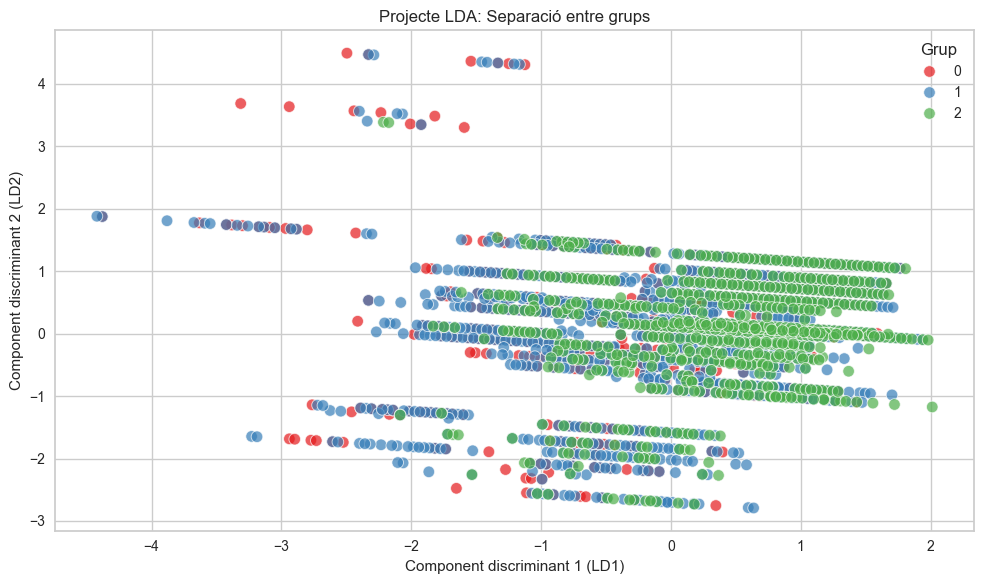

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder

# 1. Preparem les dades (com abans)
df_total = pd.concat([
    taula_pefils_0contractats.assign(grup=0),
    taula_pefils_1contractats.assign(grup=1),
    taula_df_mes_dun_contractat.assign(grup=2)
])

# 2. Codifiquem les variables categ√≤riques
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(df_total[['education', 'job']])

# 3. Combineu amb edat
X = np.column_stack([df_total['age'].values, X_encoded])
y = df_total['grup'].values

# 4. Apliquem LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# 5. Creem un DataFrame per a graficar
df_lda = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
df_lda['grup'] = y

# 6. Gr√†fic
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_lda,
    x='LD1',
    y='LD2',
    hue='grup',
    palette='Set1',
    alpha=0.7,
    s=70
)
plt.title('Projecte LDA: Separaci√≥ entre grups')
plt.xlabel('Component discriminant 1 (LD1)')
plt.ylabel('Component discriminant 2 (LD2)')
plt.legend(title='Grup')
plt.grid(True)
plt.tight_layout()
plt.show()


Biplot de c√†rregues LDA

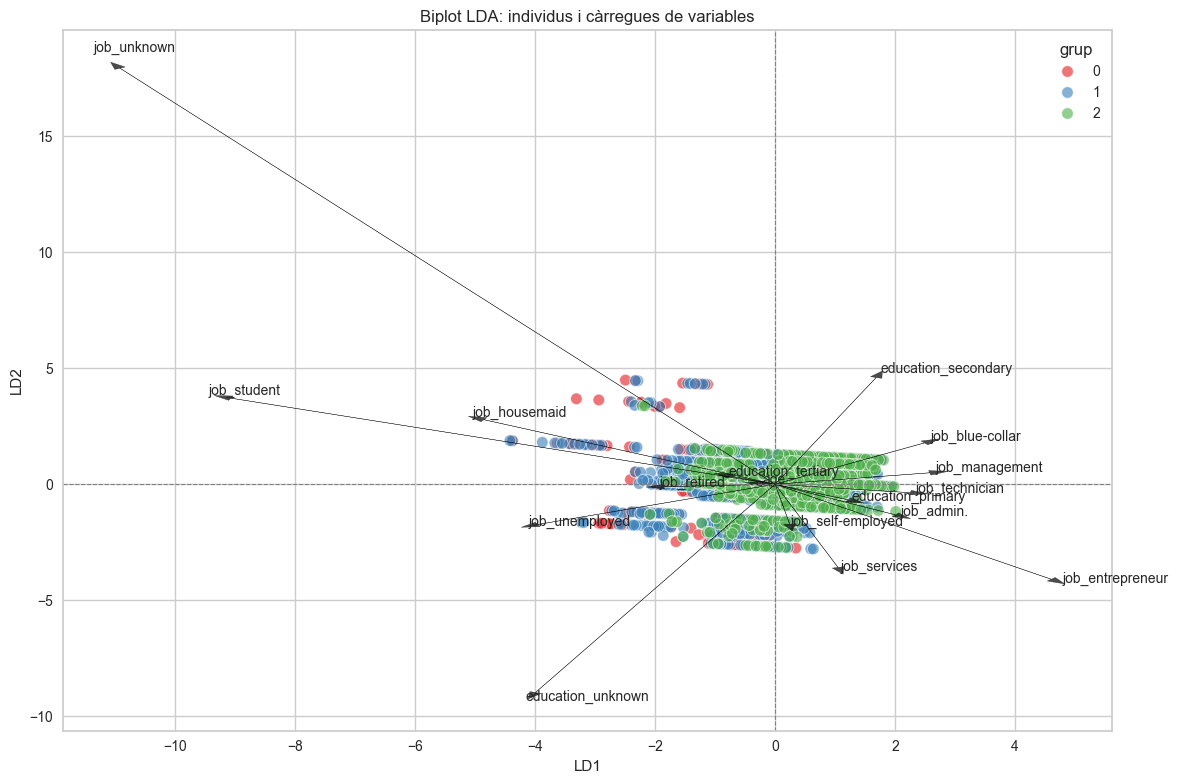

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder

# Codificaci√≥ de les variables i combinaci√≥
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(df_total[['education', 'job']])
X = np.column_stack([df_total['age'].values, X_encoded])
y = df_total['grup'].values

# Noms de les columnes
features = ['age'] + list(encoder.get_feature_names_out(['education', 'job']))

# LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# C√†rregues (coeficients)
loadings = lda.scalings_[:, :2]  # nom√©s primeres 2 components

# Crear el biplot
plt.figure(figsize=(12, 8))

# Punts projectats
df_plot = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
df_plot['grup'] = y
sns.scatterplot(data=df_plot, x='LD1', y='LD2', hue='grup', palette='Set1', alpha=0.6, s=70)

# Afegim fletxes de les variables (c√†rregues)
for i, feature in enumerate(features):
    plt.arrow(0, 0,  # origen
              loadings[i, 0]*5, loadings[i, 1]*5,  # escalat per visibilitat
              color='black', alpha=0.7, head_width=0.2)
    plt.text(loadings[i, 0]*5.2, loadings[i, 1]*5.2, feature, fontsize=10)

plt.title('Biplot LDA: individus i c√†rregues de variables')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()


Gr√†fic de barres circular

Cada gr√†fic mostra la distribuci√≥ percentual dels tipus de job dins de cada grup.

Mostra tres gr√†fics de barres circulars, un per cada grup (grup == 0, 1, 2).

La longitud de cada barra representa el percentatge de cada job dins del grup.

Utilitza una paleta de color des de gris fosc fins a turquesa per mostrar millor la magnitud.



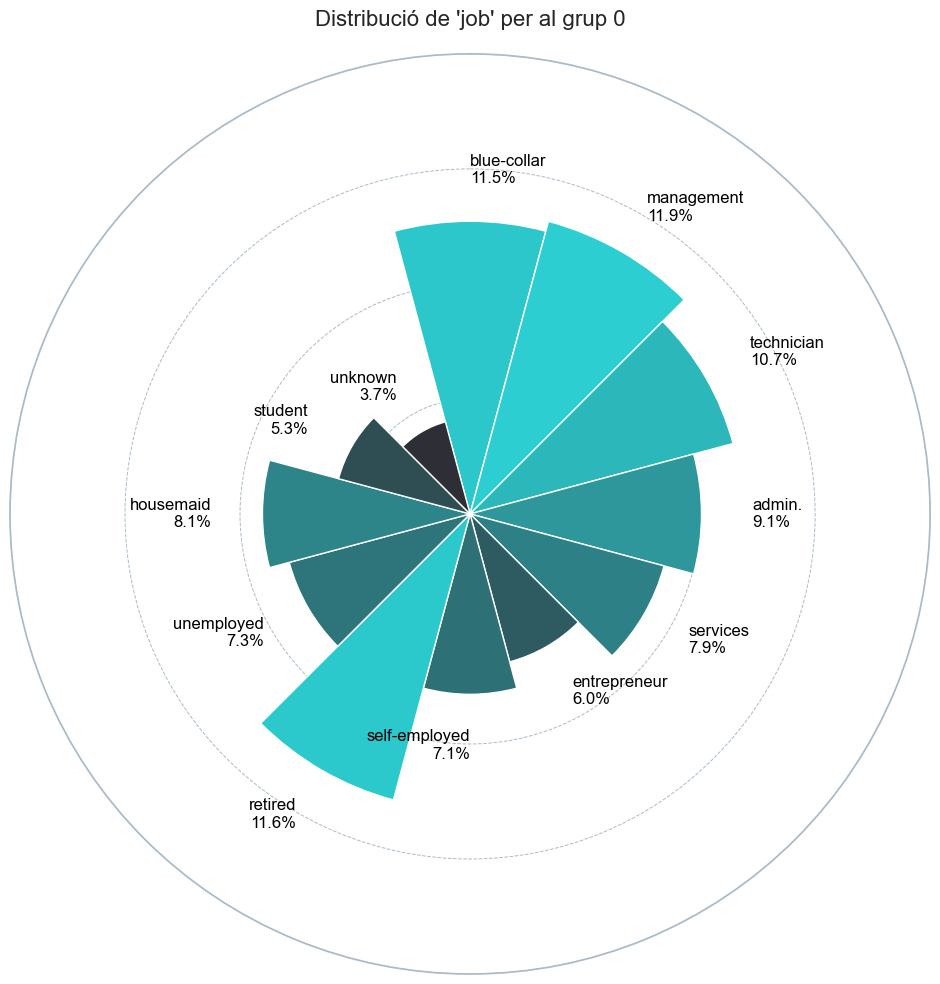

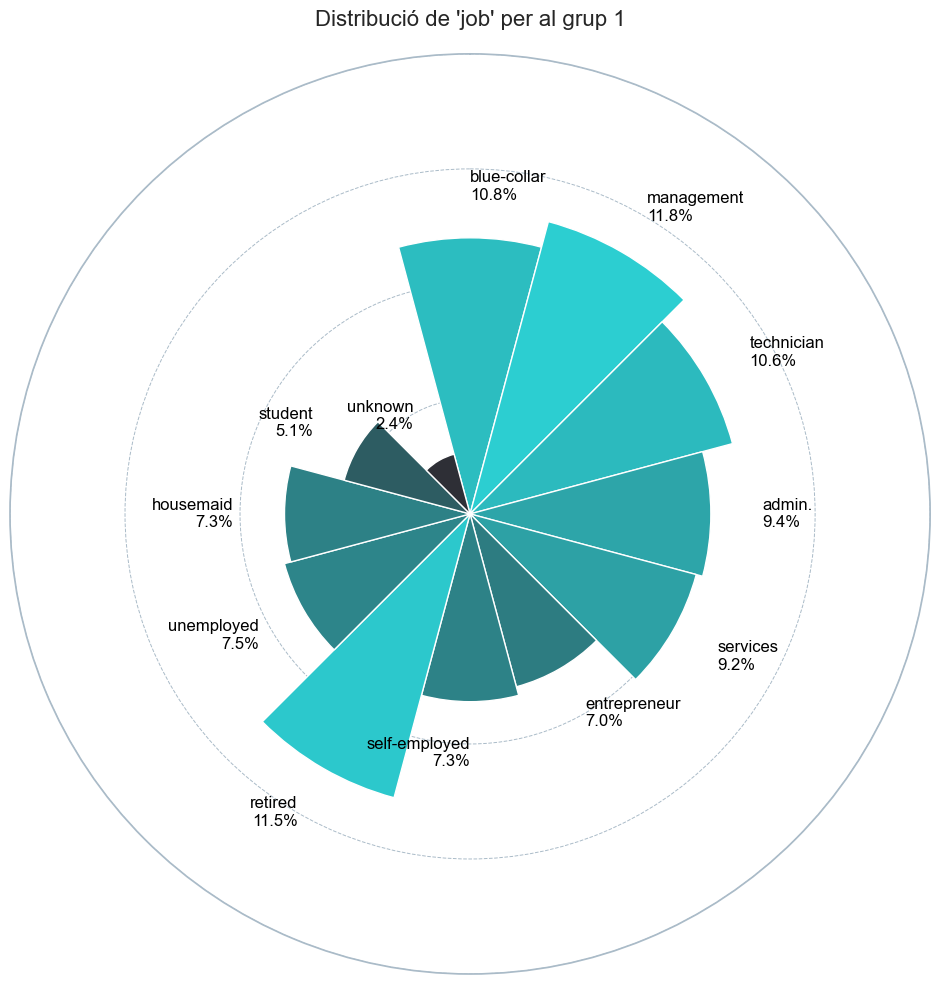

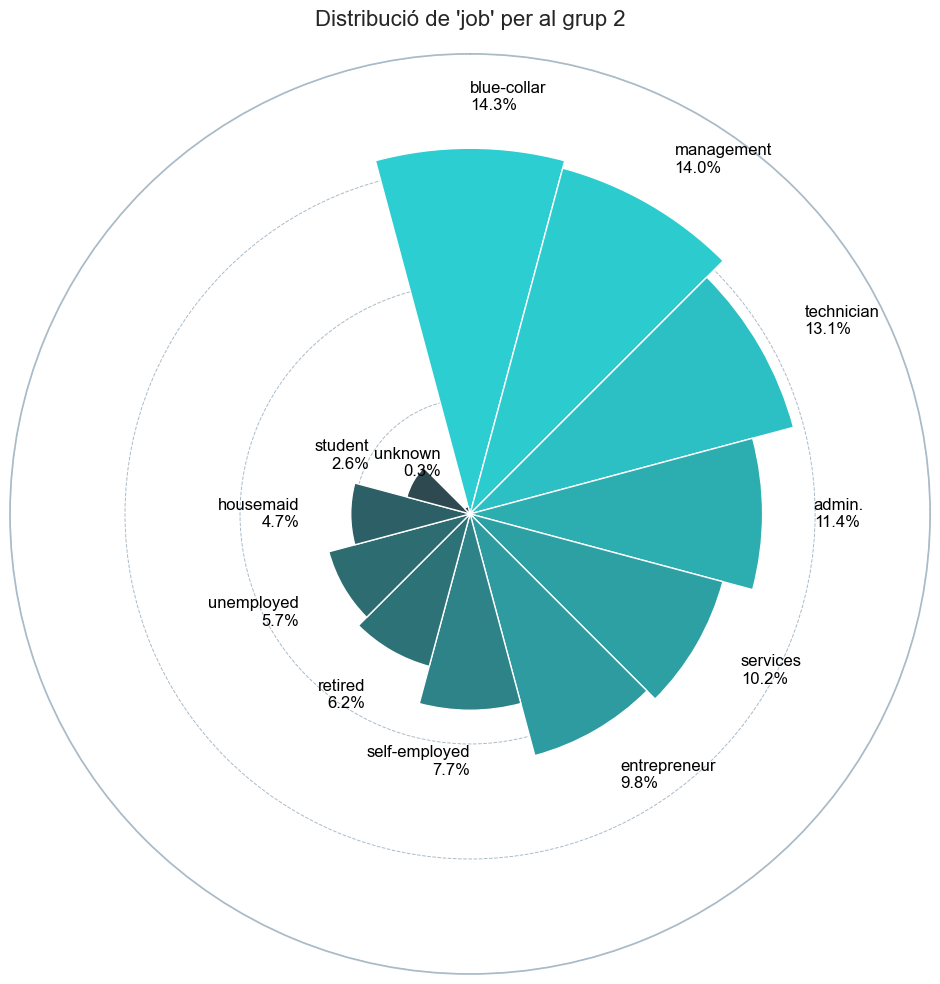

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Pas 1: Definir l'ordre de job segons el grup 2
df_g2 = df_total[df_total['grup'] == 2]
totals_g2 = df_g2['job'].value_counts(normalize=True) * 100
ordre_jobs = totals_g2.sort_values(ascending=False).index.tolist()

# Pas 2: Funci√≥ per fer el gr√†fic per a un grup donat seguint l'ordre de grup 2
def plot_circular_bar_for_group(df, grup_num, ordre_jobs):
    df_grup = df[df['grup'] == grup_num]
    
    # Comptar percentatges per job dins del grup
    totals_per_job = df_grup['job'].value_counts()
    percentatge_job = (totals_per_job / totals_per_job.sum()) * 100

    # Reordenar segons ordre de grup 2 i omplir amb 0 si falta algun job
    percentatge_reordenat = pd.Series({job: percentatge_job.get(job, 0) for job in ordre_jobs})

    # Paleta de colors
    norm = plt.Normalize(percentatge_reordenat.min(), percentatge_reordenat.max())
    cmap = mcolors.LinearSegmentedColormap.from_list("custom", ["#2E2F36", "#2CCED1"])
    colors = [cmap(norm(v)) for v in percentatge_reordenat]

    # Configuraci√≥ polar
    N = len(percentatge_reordenat)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    values = percentatge_reordenat.tolist()
    labels = ordre_jobs

    # Per fer el cercle complet
    angles += angles[:1]
    values += values[:1]
    colors += colors[:1]
    labels += labels[:1]

    # Crear gr√†fic
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'polar': True})
    
    bars = ax.bar(
        angles[:-1], values[:-1], width=2*np.pi/N, color=colors[:-1], edgecolor='white', linewidth=1
    )

    # Etiquetes
    for angle, value, label in zip(angles[:-1], values[:-1], labels[:-1]):
        rotation = np.degrees(angle)
        alignment = 'left' if rotation < 180 else 'right'
        ax.text(
            angle,
            value + 2,
            f"{label}\n{value:.1f}%",
            ha=alignment,
            va='center',
            rotation=0,
            rotation_mode='anchor',
            fontsize=12,
            color='black'
        )
    # Valor m√†xim com√∫ per totes les gr√†fiques 
    max_value = 18  

    # Est√®tica
    ax.grid(color='#AABBC8', linestyle='--', linewidth=0.7)
    ax.spines['polar'].set_color('#AABBC8')
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_ylim(0, max(values) + 10)
    ax.set_yticklabels([])
    ax.set_xticks([])



    # üîß Igualar l√≠mits i ticks en totes les gr√†fiques
    ax.set_ylim(0, max_value)
    ax.set_yticks(np.linspace(0, max_value, 5))  # 5 l√≠nies iguals per tots
    ax.set_yticklabels([])  # opcional: buida si no vols etiquetes

    ax.set_xticks([])  # eliminar ticks circulars


    plt.title(f"Distribuci√≥ de 'job' per al grup {grup_num}", fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

# Pas 3: Generar gr√†fics per als tres grups (amb el mateix ordre de jobs)
for g in sorted(df_total['grup'].unique()):
    plot_circular_bar_for_group(df_total, g, ordre_jobs)


Ara comparem el nivell d'estudis

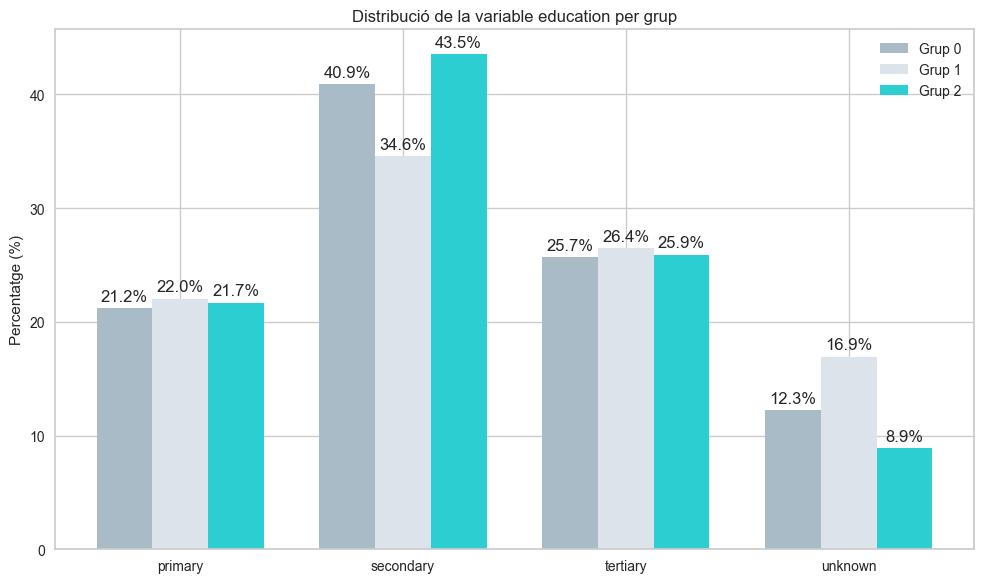

In [71]:

custom_palette = ["#AABBC8", "#DCE3EA", "#2CCED1", "#5F6F81", "#2E2F36"]  
sns.set_palette(sns.color_palette(custom_palette))

# Definir l'ordre desitjat per a education
ordre_education = ['primary', 'secondary', 'tertiary', 'unknown']

# Calcular percentatge d'education per grup
percentatge_per_grup = df_total.groupby(['grup', 'education']).size().unstack(fill_value=0)

# Reindexar les columnes segons l'ordre desitjat
percentatge_per_grup = percentatge_per_grup[ordre_education]

# Convertir a percentatge dins de cada grup
percentatge_per_grup = percentatge_per_grup.div(percentatge_per_grup.sum(axis=1), axis=0) * 100

# Par√†metres per al gr√†fic
labels = ordre_education
x = np.arange(len(labels))  # posici√≥ de les categories
width = 0.25  # amplada de cada barra

fig, ax = plt.subplots(figsize=(10, 6))

# Barres per cada grup
rects0 = ax.bar(x - width, percentatge_per_grup.loc[0], width, label='Grup 0')
rects1 = ax.bar(x, percentatge_per_grup.loc[1], width, label='Grup 1')
rects2 = ax.bar(x + width, percentatge_per_grup.loc[2], width, label='Grup 2')

# Est√®tica
ax.set_ylabel('Percentatge (%)')
ax.set_title('Distribuci√≥ de la variable education per grup')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=0)
ax.legend()

# Mostrar valors a sobre les barres
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects0)
autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


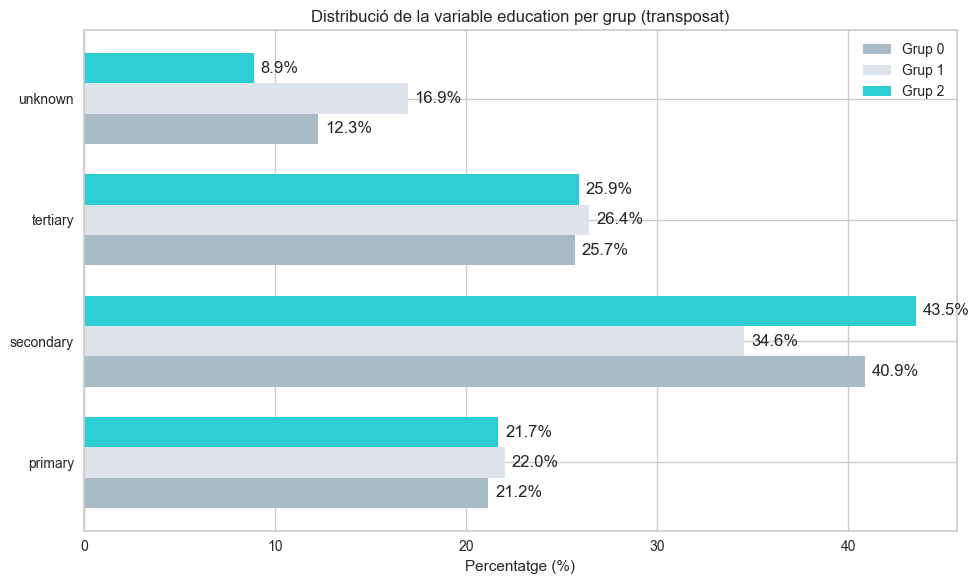

In [72]:


# Definir l'ordre desitjat per a education
ordre_education = ['primary', 'secondary', 'tertiary', 'unknown']

# Calcular percentatge d'education per grup
percentatge_per_grup = df_total.groupby(['grup', 'education']).size().unstack(fill_value=0)

# Reindexar les columnes segons l'ordre desitjat
percentatge_per_grup = percentatge_per_grup[ordre_education]

# Convertir a percentatge dins de cada grup
percentatge_per_grup = percentatge_per_grup.div(percentatge_per_grup.sum(axis=1), axis=0) * 100

# Transposar per graficar per nivells d'educaci√≥
df_plot = percentatge_per_grup.T  # index = education, columns = grup

# Par√†metres per al gr√†fic
labels = df_plot.index.tolist()
y = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

# Barres per cada grup (transposades)
rects0 = ax.barh(y - width, df_plot[0], height=width, label='Grup 0')
rects1 = ax.barh(y, df_plot[1], height=width, label='Grup 1')
rects2 = ax.barh(y + width, df_plot[2], height=width, label='Grup 2')

# Est√®tica
ax.set_xlabel('Percentatge (%)')
ax.set_title('Distribuci√≥ de la variable education per grup (transposat)')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend()

# Mostrar valors al costat de les barres
def autolabel_horizontal(rects):
    for rect in rects:
        width = rect.get_width()
        ax.annotate(f'{width:.1f}%',
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(5, 0),  # offset horitzontal
                    textcoords="offset points",
                    ha='left', va='center')

autolabel_horizontal(rects0)
autolabel_horizontal(rects1)
autolabel_horizontal(rects2)

plt.tight_layout()
plt.show()


/var/folders/tj/x1zxmcgd19nbm3pz04lp5pv40000gn/T/ipykernel_9660/2823615729.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq = df_total.groupby(['age_bin', 'grup']).size().unstack(fill_value=0)


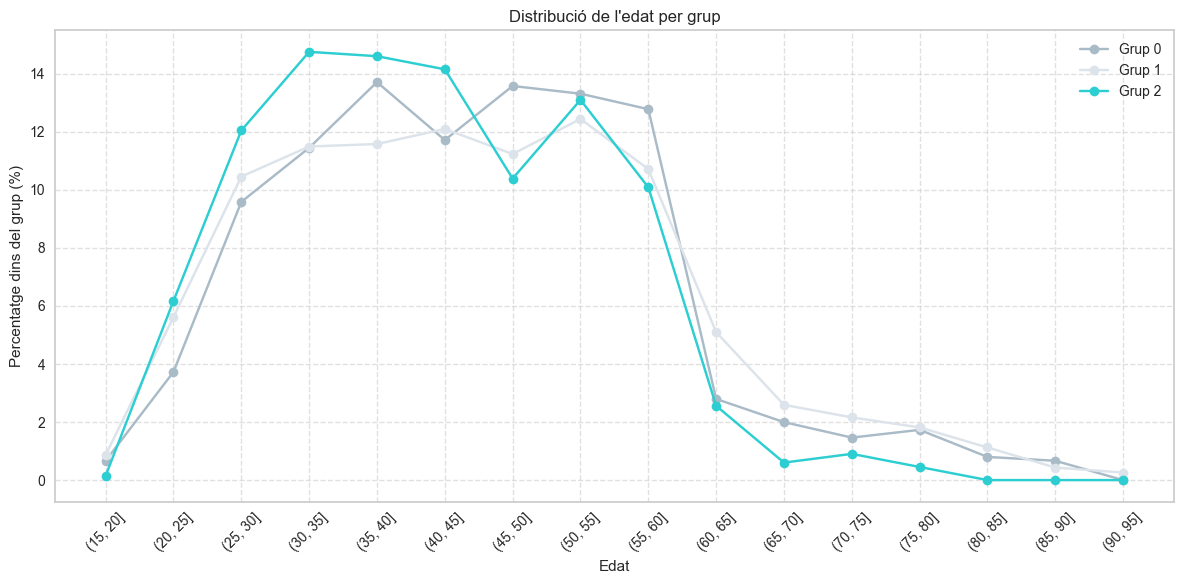

In [ ]:


# Crear intervals d‚Äôedat (bins)
bins = np.arange(15, 100, 5)  # intervals de 5 anys
df_total['age_bin'] = pd.cut(df_total['age'], bins=bins)

# Comptar per grup i interval
freq = df_total.groupby(['age_bin', 'grup']).size().unstack(fill_value=0)

# Convertir a percentatge dins de cada grup
freq_percent = freq.div(freq.sum(axis=0), axis=1) * 100

# Centrar les etiquetes dels bins
x_labels = freq.index.astype(str)
x_pos = [interval.mid for interval in freq.index]

# Dibuixar
plt.figure(figsize=(12, 6))

plt.plot(x_pos, freq_percent[0], label='Grup 0', marker='o')
plt.plot(x_pos, freq_percent[1], label='Grup 1', marker='o')
plt.plot(x_pos, freq_percent[2], label='Grup 2', marker='o')

plt.title('Distribuci√≥ de l\'edat per grup')
plt.xlabel('Edat')
plt.ylabel('Percentatge dins del grup (%)')
plt.xticks(ticks=x_pos, labels=x_labels, rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:

# Filtrar nom√©s el grup 2
df_grup2 = df_total[df_total['grup'] == 2]

# Agrupar per education i job
perfils = (
    df_grup2
    .groupby(['education', 'job'])
    .agg(
        comptador=('age', 'count'),
        edat_mitjana=('age', 'mean')
    )
    .reset_index()
)

# Seleccionar els 10 perfils m√©s freq√ºents
top10 = perfils.sort_values(by='comptador', ascending=False).head(6)

# Crear taula amb plotly (comptador primer)
fig = go.Figure(data=[
    go.Table(
        header=dict(
            values=[
                '<b>Comptador</b>',
                '<b>Educaci√≥</b>',
                '<b>Feina</b>',
                '<b>Edat mitjana</b>'
            ],
            fill_color='lightgrey',
            align='left'
        ),
        cells=dict(
            values=[
                top10['comptador'],
                top10['education'],
                top10['job'],
                top10['edat_mitjana'].round(1)
            ],
            fill_color='white',
            align='left'
        )
    )
])

fig.update_layout(
    title='Top 6 perfils amb dos o m√©s productes contractats',
    height=450
)

fig.show()


In [ ]:
import plotly.graph_objects as go

clust_data = {
    "Cl√∫ster": ["0", "1", "2"],
    "Edat mitjana": ["<b>56 anys</b>", "<b>28,8 anys</b>", "<b>41 anys</b>"],
    "Educaci√≥ dominant": ["<b>Secund√†ria</b>", "<b>Secund√†ria i terci√†ria</b>", "<b>Secund√†ria</b>"],
    "Feina destacada": [
        "<b>Retirats, management</b>",
        "<b>Blue-collar, t√®cnics, serveis</b>",
        "<b>Blue-collar, t√®cnics</b>"
    ],
    "Perfil resumit": [
        "Adults grans consolidats",
        "Joves amb alta activitat i capacitat contractant",
        "Adults actius amb estabilitat laboral"
    ]
}

columns = list(clust_data.keys())
values = [clust_data[col] for col in columns]

# Comprovaci√≥ addicional (opcional): assegurar longituds iguals
assert all(len(v) == len(values[0]) for v in values), "‚ö†Ô∏è Alguna llista t√© una longitud diferent!"

fig = go.Figure(data=[
    go.Table(
        header=dict(
            values=columns,
            fill_color='lightgrey',
            align='left',
            font=dict(size=13, color='black')
        ),
        cells=dict(
            values=values,
            fill_color='white',
            align='left',
            font=dict(size=12)
        )
    )
])

fig.update_layout(
    title='Perfil resumit per cl√∫ster',
    height=500
)

fig.show()


In [86]:
import plotly.graph_objects as go

# Paleta personalitzada
custom_palette = ["#AABBC8", "#DCE3EA", "#2CCED1", "#5F6F81", "#2E2F36"]

clust_data = {
    "Cl√∫ster": ["0", "1", "2"],
    "Edat mitjana": ["56 anys", "28,8 anys", "41 anys"],
    "Educaci√≥ dominant": ["Secund√†ria", "Secund√†ria i terci√†ria", "Secund√†ria"],
    "Feina destacada": [
        "Retirats, management",
        "Blue-collar, t√®cnics, serveis",
        "Blue-collar, t√®cnics"
    ],
    "Perfil resumit": [
        "<b>Adults grans consolidats</b>",
        "<b>Joves amb alta activitat i capacitat contractant</b>",
        "<b>Adults actius amb estabilitat laboral</b>"
    ]
}

columns = list(clust_data.keys())
values = [clust_data[col] for col in columns]

# Comprovaci√≥: totes les llistes han de tenir la mateixa llargada
assert all(len(v) == len(values[0]) for v in values), "‚ö†Ô∏è Alguna llista t√© una longitud diferent!"

# Aplicar un color per fila (repetim la paleta per cada columna)
row_colors = [custom_palette[i] for i in range(len(values[0]))]
fill_colors = [[row_colors[row]] * len(columns) for row in range(len(row_colors))]

fig = go.Figure(data=[
    go.Table(
        header=dict(
            values=columns,
            fill_color='#2E2F36',
            align='left',
            font=dict(size=13, color='white')
        ),
        cells=dict(
            values=values,
            fill_color=fill_colors,
            align='left',
            font=dict(size=12, color='black')
        )
    )
])

fig.update_layout(
    title='Perfil resumit per cl√∫ster',
    height=500
)

fig.show()
